In [2]:
!pip install polars

**Comparison of polars and pandas**

Here is a small comparison of polars and pandas libraries.  
****
**Сравнение polars и pandas**

Здесь просто небольшое сравнение библиотек polars и pandas.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

**Step 0.**

For palpability, the dataset is increased to 1 million observations.

****

**Шаг 0.**

Для наглядности набор данных увеличен до 1 миллиона наблюдений.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/AI_education/data/online_shoppers_intention.csv')

In [11]:
df_big = df.copy()

for i in range(82):
  df_big = pd.concat([df_big, df])

df_big.to_csv("/content/drive/MyDrive/AI_education/data/online_shoppers_intention_big.csv", index=False)

**1. Loading data**
****
**1. Загрузка данных**

In [12]:
current_time = datetime.now()
df_pl = pl.read_csv("/content/drive/MyDrive/AI_education/data/online_shoppers_intention_big.csv")
total_time_load_pl =  datetime.now() - current_time


current_time = datetime.now()
df_pd = pd.read_csv("/content/drive/MyDrive/AI_education/data/online_shoppers_intention_big.csv")
total_time_load_pd =  datetime.now() - current_time


In [13]:
print(total_time_load_pl, total_time_load_pd)

0:00:01.946147 0:00:02.495323


**2. Data filtering** \
Returned users who have visited more than 5 information pages are taken here.

****

**2. Фильтрация данных** \
Взяты вернувшиеся пользователи, посетившие более 5ти информационных страниц.

In [14]:
#polars
current_time = datetime.now()
pl_res = df_pl.filter((pl.col('VisitorType') == 'Returning_Visitor') & (pl.col('Informational') > 5))
total_time_filter_pl =  datetime.now() - current_time

#pandas
current_time = datetime.now()
pd_res = df_pd.query('VisitorType == "Returning_Visitor" & Informational > 5')
total_time_filter_pd =  datetime.now() - current_time

assert len(pl_res) == len(pd_res)

**3. Data aggregation** \
Aggregated number of users by month.

****

**3. Агрегация данных** \
Агрегировано количество пользователей по месяцам.

In [15]:
#polars
current_time = datetime.now()
df_pl.groupby(by='Month').agg(pl.col('VisitorType').count())
total_time_agg_pl =  datetime.now() - current_time

#pandas
current_time = datetime.now()
df_pd.groupby(by='Month').agg({'VisitorType' : 'count'})
total_time_agg_pd =  datetime.now() - current_time

In [17]:
pl_results = [total_time_load_pl, total_time_filter_pl, total_time_agg_pl]
pd_results = [total_time_load_pd, total_time_filter_pd, total_time_agg_pd]

operations_data = pd.DataFrame(data = np.vstack([pl_results, pd_results])).T
operations_data.columns = ['Polars', 'Pandas']
operations_data['diff_Pd_Pl'] = operations_data['Pandas'] - operations_data['Polars']

operations_data.index = ['Load', 'Filter', 'Aggregation']

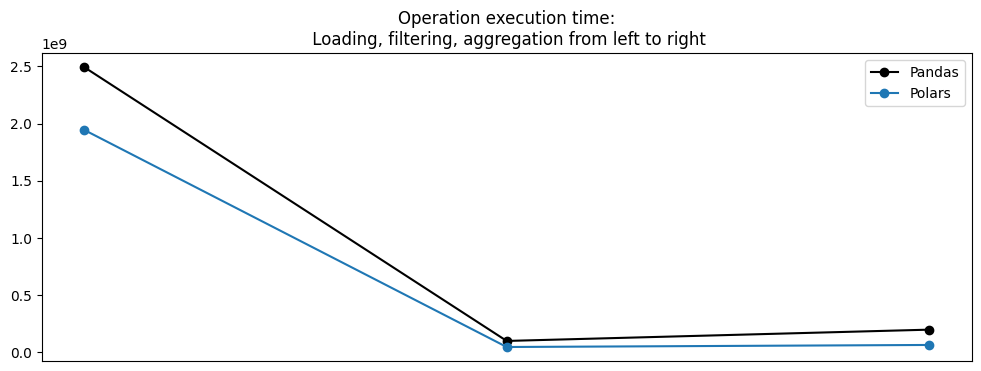

In [18]:
import matplotlib.dates as md
import dateutil

plt.figure(figsize=(12, 4))
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)

plt.plot([1, 2, 3], operations_data['Pandas'], marker='o', label='Pandas', color='black')
plt.plot([1, 2, 3], operations_data['Polars'], marker='o', label='Polars')

plt.legend()
plt.xticks(rotation=30, ticks=[], labels=None)

plt.title('Operation execution time:\n Loading, filtering, aggregation from left to right');

##**Conclusion**

On a dataset of size `(1023390, 18)`, polars small (but not on all iterations of the check) outperforms pandas in grazuka and performs comparably in data filtering and aggregation tasks.

****

**Вывод**

На наборе данных размером `(1023390, 18)` polars немного (но не на всех итерациях проверки) превосходит pandas в гразуке и работает сопоставимо в задачах фильтрации и агрегации данных.  